## Class attendance system 
### Steps to be followed :
- Extract faces from a image
- Match the faces from known faces of student in MyClass folder
- Show Detected faces
- Mark the faces as present
- Save it in attendane.cvs file

In [4]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from cvzone.FaceDetectionModule import FaceDetector
import os
import random

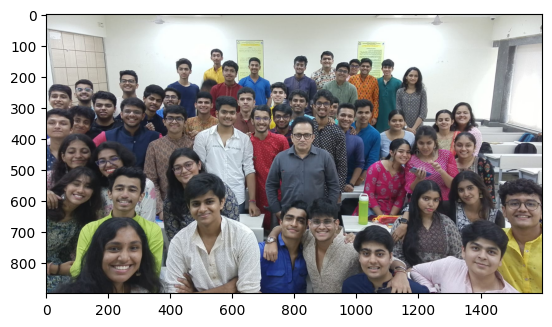

In [2]:
classPhoto = plt.imread("ClassPhoto.jpeg")
plt.imshow(classPhoto)

### Extracting images and storing in a folder


In [9]:
path = "ClassPhoto.jpeg"
image = cv2.imread(path)

faces= DeepFace.extract_faces(
  img_path = path
)



In [16]:
for i in range(len(faces)):
   x, y, w, h = faces[i]["facial_area"]["x"], faces[i]["facial_area"]["y"], faces[i]["facial_area"]["w"], faces[i]["facial_area"]["h"]
   face_img = image[y:y+h, x:x+w]
   cv2.imwrite(f"Myclass/{i}.jpg" , face_img)

for i in range(len(faces)):
   x, y, w, h = faces[i]["facial_area"]["x"], faces[i]["facial_area"]["y"], faces[i]["facial_area"]["w"], faces[i]["facial_area"]["h"]
   cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  

Text(0.5, 1.0, 'Detected Image')

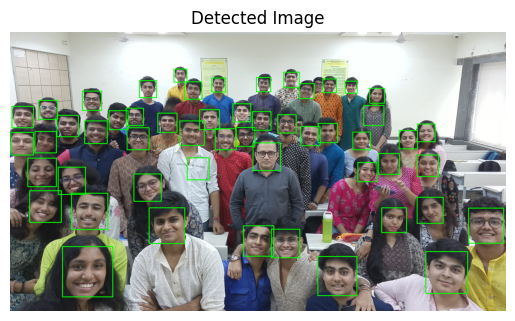

In [17]:
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGBimage)
plt.axis("off")
plt.title("Detected Image")



### Displaying images form myclass

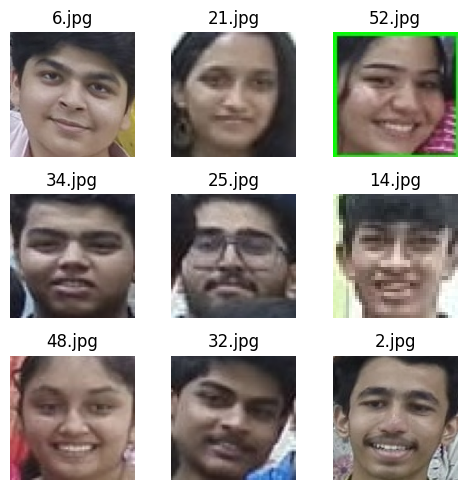

In [20]:
def display_random_images(directory, num_images=9):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(image_files) < num_images:
        print(f"Not enough images in the directory. Found {len(image_files)} images.")
        num_images = len(image_files)
    random_images = random.sample(image_files, num_images)
    
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    axes = axes.flatten()
    
  
    for i, image_file in enumerate(random_images):
        img = plt.imread(os.path.join(directory, image_file))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(image_file)
 
    plt.tight_layout()
    plt.show()

directory = "myclass"
display_random_images(directory, num_images=9)


### Marking attendance


In [53]:
uploaded_path = "Myclass/6.jpg"
directory = "Myclass"

files = os.listdir(directory)

for file in files:
    file_path = os.path.join(directory, file)

    try:
        result = DeepFace.verify(uploaded_path, file_path)
        if result["verified"]:  
            print(f"Same as {file}")
        else:
            # print(f"{file} is not a match")
            pass
    except Exception as e:
        # print(f"Error processing {file_path}: {e}")
        pass


Same as 17.jpg
Same as 22.jpg
Same as 36.jpg
Same as 43.jpg
Same as 6.jpg
Same as 8.jpg


### Best Match

In [67]:
uploaded_path = "Myclass/6.jpg"
directory = "Myclass"

files = os.listdir(directory)

best_match = None
best_distance = float('inf')

for file in files:
    file_path = os.path.join(directory, file)

    try:
        result = DeepFace.verify(uploaded_path, file_path)
        if result["verified"]:
            distance = result["distance"]
            if distance < best_distance:
                best_distance = distance
                best_match = file
    except Exception as e:
        pass

if best_match:
    print(f"Best match: {best_match} with distance: {best_distance}")
else:
    print("No matches found")


Best match: 6.jpg with distance: 0.0


In [17]:
def compare_faces(database_path, image_path):
    print('start')
   
    database_files = os.listdir(database_path)

    result = {}
    i =0
    print('entering loop')
    for file_name in database_files:
        img1_path = os.path.join(database_path, file_name)
        img2_path = image_path
        
        result[file_name] = DeepFace.verify(img1_path, img2_path)['verified']
        print(i)
        i = i+1

    return result

In [29]:

students_folder = 'Database'
class_photo_path = 'sm.jpeg'
result = detect_students_in_class(students_folder, class_photo_path)
print(result)


24-06-15 16:45:51 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
44.jpg
24-06-15 16:45:51 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
24-06-15 16:45:51 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
trump2.png
loop 1 ended
{'face': array([[[0.16078431, 0.34509804, 0.61176471],
        [0.17254902, 0.34901961, 0.61176471],
        [0.23921569, 0.39215686, 0.62352941],
        ...,
        [0.29019608, 0.30980392, 0.38431373],
        [0.29411765, 0.31372549, 0.39215686],
        [0.31372549, 0.33333333, 0.41960784]],

       [[0.17254902, 0.34117647, 0.60784314],
        [0.21568627, 0.37254902, 0.64313725],
        [0.26666667, 0.40392157, 0.63137255],
        ...,
        [0.23921569, 0.25882353, 0.33333333],
        [0.29803922, 0.31764706, 0.39607843],
        [0.28627451, 0.30588235, 0.39215686]],

       [[0.17647059, 0.3372549 , 0.59607843],
        [0.21176471, 0.36470588, 0.62745098],
        [0.2627451 , 0.38431373

KeyboardInterrupt: 

In [30]:
import os
from deepface import DeepFace
from PIL import Image
import numpy as np

def save_temp_image(image_array, path):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    image.save(path)

def detect_students_in_class(students_folder, class_photo_path):
    result = {}
    known_faces = []
    student_names = []

    for student_image in os.listdir(students_folder):
        if student_image.endswith(('png', 'jpg', 'jpeg')):
            student_image_path = os.path.join(students_folder, student_image)
            try:
                student_face = DeepFace.detectFace(student_image_path, detector_backend='opencv')
                known_faces.append(student_image_path)
                student_names.append(student_image)
                result[student_image] = 'absent'
            except Exception as e:
                result[student_image] = 'absent'

    class_faces = DeepFace.extract_faces(class_photo_path, detector_backend='opencv')

    for class_face in class_faces:
        class_face_image = class_face['face']
        temp_face_path = 'temp_face.jpg'
        save_temp_image(class_face_image, temp_face_path)

        for idx, student_image_path in enumerate(known_faces):
            try:
                verification = DeepFace.verify(img1_path=student_image_path, img2_path=temp_face_path, detector_backend='opencv')
                if verification['verified']:
                    result[student_names[idx]] = 'present'
            except Exception as e:
                print(f"Error verifying {student_image_path} with detected face: {e}")

        os.remove(temp_face_path)

    return result


students_folder = 'Database'
class_photo_path = 'sm.jpeg'
result = detect_students_in_class(students_folder, class_photo_path)
print(result)



24-06-15 16:46:36 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
24-06-15 16:46:36 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
Error processing Database\45.jpg: Face could not be detected in Database\45.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
24-06-15 16:46:36 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
{'44.jpg': 'present', '45.jpg': 'absent', 'trump2.png': 'absent'}


In [46]:
def compairfaces(db , classphoto):
    result = {}

    # for student in os.listdir(db):
    #     print(student)
    
    for face in classphoto:
        student_face = DeepFace.detectFace(classphoto)
        # print(student_face)
        plt.imshow(student_face)
 
    return result

24-06-15 16:55:06 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
[[[[0.34509805 0.40784314 0.46666667]
   [0.3599965  0.42500874 0.48415616]
   [0.43005952 0.50573355 0.56640404]
   ...
   [0.2753939  0.2871586  0.3146096 ]
   [0.31347165 0.32523635 0.35268733]
   [0.32156864 0.33333334 0.36078432]]

  [[0.33732492 0.3987745  0.45662642]
   [0.35120693 0.4148969  0.47309944]
   [0.41648984 0.4907158  0.5505672 ]
   ...
   [0.2764364  0.2882011  0.31595716]
   [0.3197974  0.33156213 0.3590666 ]
   [0.32901785 0.34078255 0.36823353]]

  [[0.3007703  0.35612744 0.40941   ]
   [0.30987218 0.36734396 0.42110294]
   [0.35267565 0.4200918  0.47609127]
   ...
   [0.2813389  0.2931036  0.32229438]
   [0.34954563 0.36131033 0.3890664 ]
   [0.36404938 0.37581408 0.40326506]]

  ...

  [[0.44867823 0.5310312  0.6013918 ]
   [0.44723016 0.5302309  0.59996253]
   [0.44042036 0.52646726 0.59324116]
   ...
   [0.42277992 0.46591717 0.54434854]
   [0.42510876 0.46824604 0.5466774 ]


TypeError: Invalid shape (1, 224, 224, 3) for image data

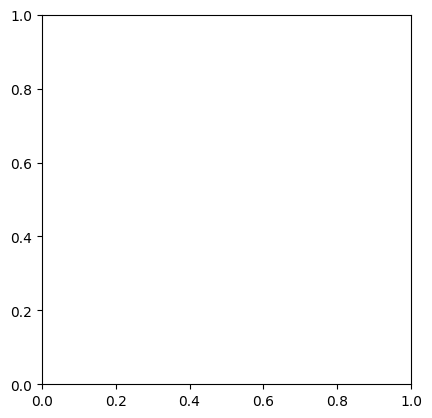

In [47]:
compairfaces('Database' , 'sm.jpeg')

In [51]:
from cvzone.FaceDetectionModule import FaceDetector
d = FaceDetector()

a = d.findFaces('sm.jpeg')
print(a)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
